In [1]:
import ROOT
import matplotlib.pyplot as plt
import mplhep as hep
from tqdm import tqdm
plt.style.use(hep.style.CMS)
import os

Welcome to JupyROOT 6.28/00


# CutFlow study for ZZbbtt

In [10]:
cmtdir = '/data_CMS/cms/vernazza/cmt/PreprocessRDF/'
conf = 'ul_2018_ZZ_v12'
sample = 'GluGluToXToZZTo2B2Tau'
fancy_name = r"$ZZ_{bb\tau\tau}$"
res_mass = "X"
suffix = ''
cat = 'cat_base_selection'
ver = 'prod_240624_CutFlow'
outdir = f"/grid_mnt/data__data.polcms/cms/vernazza/FrameworkNanoAOD/hhbbtt-analysis/nicePlots/CutFlowSplit/{ver}"
os.system(" mkdir -p " + outdir)
mass_points = [ 200, 210, 220, 230, 240, 250, 260, 270, 280, 300, 320, 350, 360, 400, 450, 500, 550,
                600, 650, 700, 750, 800, 850, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
                1800, 1900, 2000, 2200, 2400, 2500, 2600, 2800, 3000, 3500, 4000, 4500, 5000]


genPairType = 1
CutFlowSteps = {
    1: ['pairType_skip_ETau_eleOff_ETau_tauOff_ETau_dR_ETau_Trg_ETau_LepVeto', '$GenLevel\; \\tau_h\\tau_e$'],
    2: ['pairType_skip_ETau_tauOff_ETau_dR_ETau_Trg_ETau_LepVeto', '$GenLevel\; \\tau_h\\tau_e + Offline\; e$'],
    3: ['pairType_skip_ETau_dR_ETau_Trg_ETau_LepVeto', '$GenLevel\; \\tau_h\\tau_e + Offline\; e + Offline\; \\tau$'],
    4: ['pairType_skip_ETau_Trg_ETau_LepVeto', '$GenLevel\; \\tau_h\\tau_e + Offline\; e + Offline\; \\tau + \\Delta R$'],
    5: ['pairType_skip_ETau_LepVeto', '$GenLevel\; \\tau_h\\tau_e + Offline\; e + Offline\; \\tau + \\Delta R + Trigger$'],
    5: ['pairType', '$GenLevel\; \\tau_h\\tau_e + Offline\; e + Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
}
CutFlowEfficiency_ETau = {0: []}
CutFlowEfficiency_ETau.update({step: [] for step in CutFlowSteps.keys()})
for mass in tqdm(mass_points):
    indir = f'{cmtdir}/{conf}/{sample}_M{mass}{suffix}/{cat}/{ver}'
    tTree = ROOT.TChain("Events")
    tTree.Add(indir+"/data*.root")
    df = ROOT.RDataFrame(tTree)
    CutFlowEfficiency_ETau[0].append(df.Count().GetValue())
    for step in CutFlowSteps.keys():
        step_name = CutFlowSteps[step][0]
        df_cut = df.Filter(f"{step_name} == {genPairType}")
        CutFlowEfficiency_ETau[step].append(df_cut.Count().GetValue())


genPairType = 0
CutFlowSteps = {
    1: ['pairType_skip_MuTau_muOff_MuTau_tauOff_MuTau_dR_MuTau_Trg_MuTau_LepVeto', '$GenLevel\; \\tau_h\\tau_\\mu$'],
    2: ['pairType_skip_MuTau_tauOff_MuTau_dR_MuTau_Trg_MuTau_LepVeto', '$GenLevel\; \\tau_h\\tau_\\mu + Offline\; \\mu$'],
    3: ['pairType_skip_MuTau_dR_MuTau_Trg_MuTau_LepVeto', '$GenLevel\; \\tau_h\\tau_\\mu + Offline\; \\mu + Offline\; \\tau$'],
    4: ['pairType_skip_MuTau_Trg_MuTau_LepVeto', '$GenLevel\; \\tau_h\\tau_\\mu + Offline\; \\mu + Offline\; \\tau + \\Delta R$'],
    5: ['pairType_skip_MuTau_LepVeto', '$GenLevel\; \\tau_h\\tau_\\mu + Offline\; \\mu + Offline\; \\tau + \\Delta R + Trigger$'],
    5: ['pairType', '$GenLevel\; \\tau_h\\tau_\\mu + Offline\; \\mu + Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
}
CutFlowEfficiency_MuTau = {0: []}
CutFlowEfficiency_MuTau.update({step: [] for step in CutFlowSteps.keys()})
for mass in tqdm(mass_points):
    indir = f'{cmtdir}/{conf}/{sample}_M{mass}{suffix}/{cat}/{ver}'
    tTree = ROOT.TChain("Events")
    tTree.Add(indir+"/data*.root")
    df = ROOT.RDataFrame(tTree)
    CutFlowEfficiency_MuTau[0].append(df.Count().GetValue())
    for step in CutFlowSteps.keys():
        step_name = CutFlowSteps[step][0]
        df_cut = df.Filter(f"{step_name} == {genPairType}")
        CutFlowEfficiency_MuTau[step].append(df_cut.Count().GetValue())


genPairType = 2
CutFlowSteps = {
    1: ['pairType_skip_TauTau_tauOff_TauTau_dR_TauTau_Trg_TauTau_LepVeto', '$GenLevel\; \\tau_h\\tau_h$'],
    2: ['pairType_skip_TauTau_dR_TauTau_Trg_TauTau_LepVeto', '$GenLevel\; \\tau_h\\tau_h + Offline\; \\tau$'],
    3: ['pairType_skip_TauTau_Trg_TauTau_LepVeto', '$GenLevel\; \\tau_h\\tau_h + Offline\; \\tau + \\Delta R$'],
    4: ['pairType_skip_TauTau_LepVeto', '$GenLevel\; \\tau_h\\tau_h + Offline\; \\tau + \\Delta R + Trigger$'],
    5: ['pairType', '$GenLevel\; \\tau_h\\tau_h + Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
}
CutFlowEfficiency_TauTau = {0: []}
CutFlowEfficiency_TauTau.update({step: [] for step in CutFlowSteps.keys()})
for mass in tqdm(mass_points):
    indir = f'{cmtdir}/{conf}/{sample}_M{mass}{suffix}/{cat}/{ver}'
    tTree = ROOT.TChain("Events")
    tTree.Add(indir+"/data*.root")
    df = ROOT.RDataFrame(tTree)
    CutFlowEfficiency_TauTau[0].append(df.Count().GetValue())
    for step in CutFlowSteps.keys():
        step_name = CutFlowSteps[step][0]
        df_cut = df.Filter(f"{step_name} == {genPairType}")
        CutFlowEfficiency_TauTau[step].append(df_cut.Count().GetValue())

100%|██████████| 45/45 [00:50<00:00,  1.12s/it]


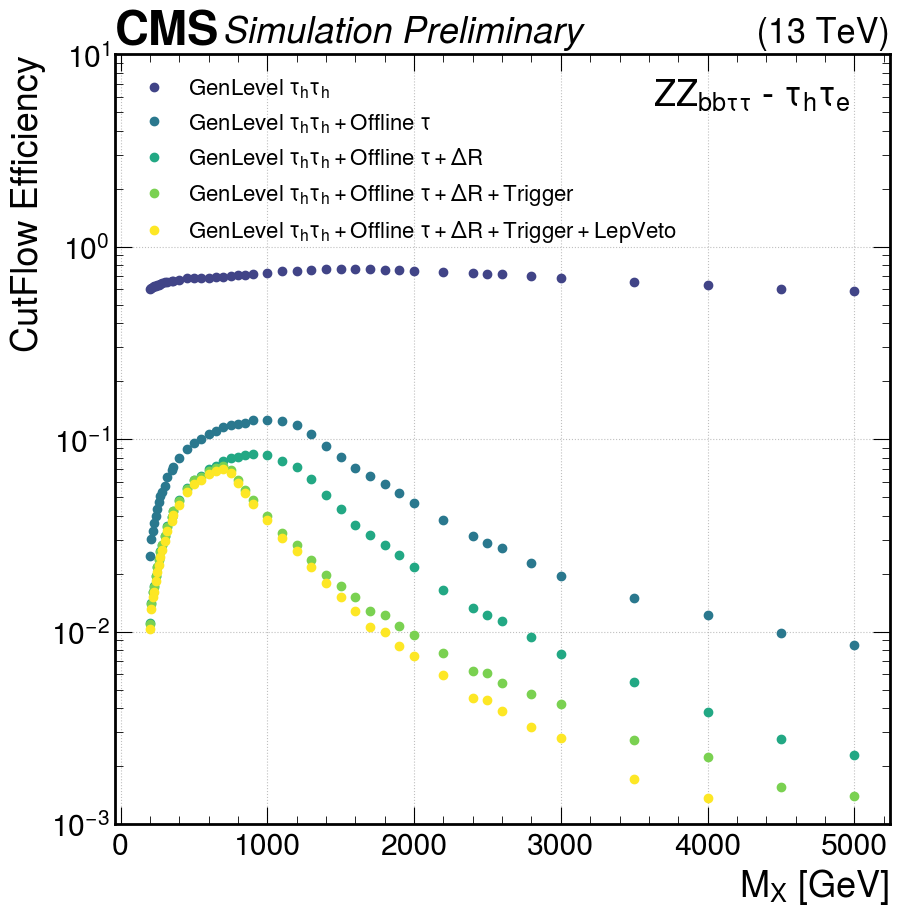

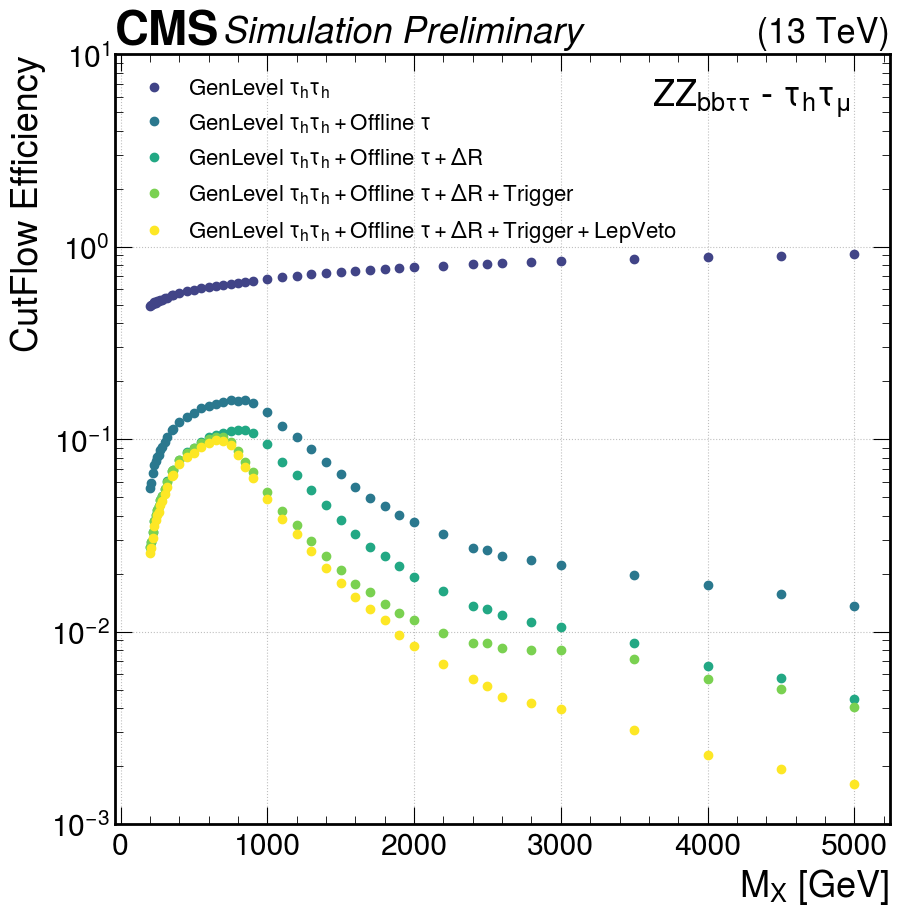

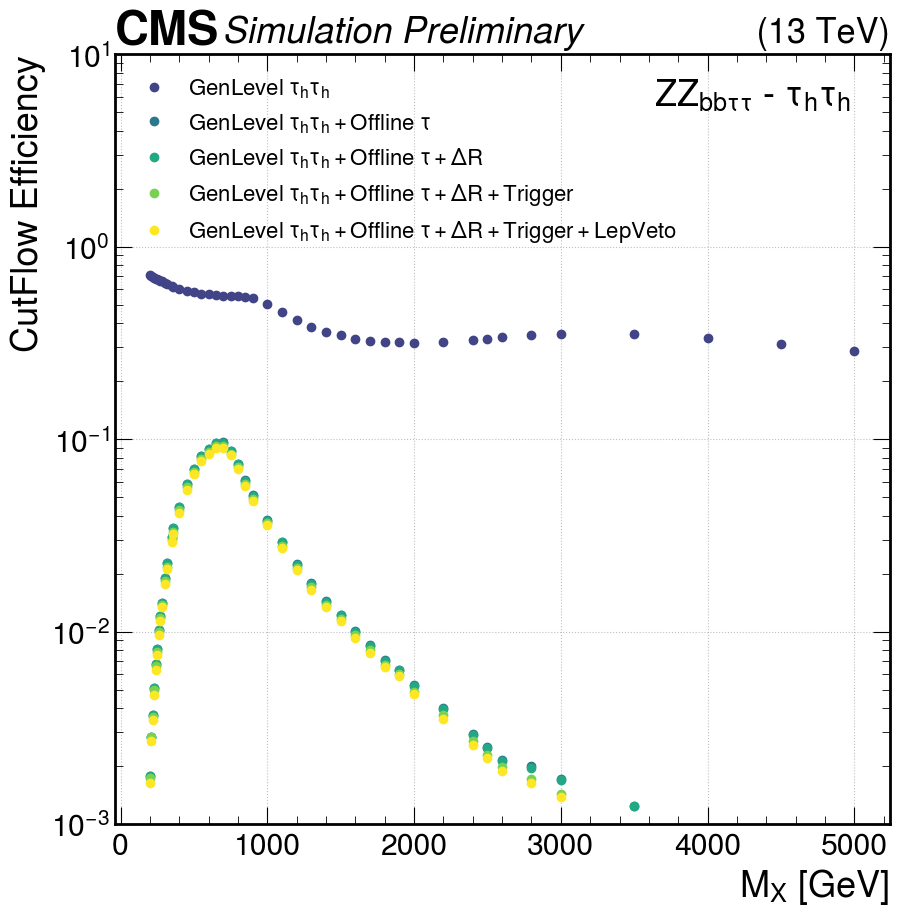

In [11]:
channel = '$\\tau_h\\tau_e$'
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for step in CutFlowSteps.keys():
    step_label = CutFlowSteps[step][1]
    efficiency = [x / y for x, y in zip(CutFlowEfficiency_ETau[step], CutFlowEfficiency_ETau[0])]
    ax.errorbar(mass_points, efficiency, label=step_label, lw=2, linestyle='', marker='o', color=cmap(step/len(CutFlowSteps.keys())))
hep.cms.label("Preliminary")
plt.text(0.95, 0.97, fancy_name + " - " + channel, ha="right", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper left', fontsize=16)
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{sample}_ETau_CutFlow.png')
plt.savefig(outdir + f'/{sample}_ETau_CutFlow.pdf')

channel = '$\\tau_h\\tau_\\mu$'
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for step in CutFlowSteps.keys():
    step_label = CutFlowSteps[step][1]
    efficiency = [x / y for x, y in zip(CutFlowEfficiency_MuTau[step], CutFlowEfficiency_MuTau[0])]
    ax.errorbar(mass_points, efficiency, label=step_label, lw=2, linestyle='', marker='o', color=cmap(step/len(CutFlowSteps.keys())))
hep.cms.label("Preliminary")
plt.text(0.95, 0.97, fancy_name + " - " + channel, ha="right", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper left', fontsize=16)
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{sample}_MuTau_CutFlow.png')
plt.savefig(outdir + f'/{sample}_MuTau_CutFlow.pdf')

channel = '$\\tau_h\\tau_h$'
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for step in CutFlowSteps.keys():
    step_label = CutFlowSteps[step][1]
    efficiency = [x / y for x, y in zip(CutFlowEfficiency_TauTau[step], CutFlowEfficiency_TauTau[0])]
    ax.errorbar(mass_points, efficiency, label=step_label, lw=2, linestyle='', marker='o', color=cmap(step/len(CutFlowSteps.keys())))
hep.cms.label("Preliminary")
plt.text(0.95, 0.97, fancy_name + " - " + channel, ha="right", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper left', fontsize=16)
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{sample}_TauTau_CutFlow.png')
plt.savefig(outdir + f'/{sample}_TauTau_CutFlow.pdf')

# CutFlow study for ZbbHtt

In [4]:
cmtdir = '/data_CMS/cms/vernazza/cmt/PreprocessRDF/'
conf = 'ul_2018_ZbbHtt_v12'
sample = 'ZprimeToZH_ZToBB_HToTauTau'
fancy_name = r"$Z_{bb}H_{\tau\tau}$"
res_mass = "Z'"
suffix = ''
cat = 'cat_base_selection'
ver = 'prod_240624_CutFlow'
mass_points = [500, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2500, 3000, 3500, 4000]

genPairType = 1
CutFlowSteps = {
    1: ['pairType_skip_ETau_eleOff_ETau_tauOff_ETau_dR_ETau_Trg_ETau_LepVeto', '$GenLevel\; \\tau_h\\tau_e$'],
    2: ['pairType_skip_ETau_tauOff_ETau_dR_ETau_Trg_ETau_LepVeto', '$GenLevel\; \\tau_h\\tau_e + Offline\; e$'],
    3: ['pairType_skip_ETau_dR_ETau_Trg_ETau_LepVeto', '$GenLevel\; \\tau_h\\tau_e + Offline\; e + Offline\; \\tau$'],
    4: ['pairType_skip_ETau_Trg_ETau_LepVeto', '$GenLevel\; \\tau_h\\tau_e + Offline\; e + Offline\; \\tau + \\Delta R$'],
    5: ['pairType_skip_ETau_LepVeto', '$GenLevel\; \\tau_h\\tau_e + Offline\; e + Offline\; \\tau + \\Delta R + Trigger$'],
    5: ['pairType', '$GenLevel\; \\tau_h\\tau_e + Offline\; e + Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
}
CutFlowEfficiency_ETau = {0: []}
CutFlowEfficiency_ETau.update({step: [] for step in CutFlowSteps.keys()})
for mass in tqdm(mass_points):
    indir = f'{cmtdir}/{conf}/{sample}_M{mass}{suffix}/{cat}/{ver}'
    tTree = ROOT.TChain("Events")
    tTree.Add(indir+"/data*.root")
    df = ROOT.RDataFrame(tTree)
    CutFlowEfficiency_ETau[0].append(df.Count().GetValue())
    for step in CutFlowSteps.keys():
        step_name = CutFlowSteps[step][0]
        df_cut = df.Filter(f"{step_name} == {genPairType}")
        CutFlowEfficiency_ETau[step].append(df_cut.Count().GetValue())


genPairType = 0
CutFlowSteps = {
    1: ['pairType_skip_MuTau_muOff_MuTau_tauOff_MuTau_dR_MuTau_Trg_MuTau_LepVeto', '$GenLevel\; \\tau_h\\tau_\\mu$'],
    2: ['pairType_skip_MuTau_tauOff_MuTau_dR_MuTau_Trg_MuTau_LepVeto', '$GenLevel\; \\tau_h\\tau_\\mu + Offline\; \\mu$'],
    3: ['pairType_skip_MuTau_dR_MuTau_Trg_MuTau_LepVeto', '$GenLevel\; \\tau_h\\tau_\\mu + Offline\; \\mu + Offline\; \\tau$'],
    4: ['pairType_skip_MuTau_Trg_MuTau_LepVeto', '$GenLevel\; \\tau_h\\tau_\\mu + Offline\; \\mu + Offline\; \\tau + \\Delta R$'],
    5: ['pairType_skip_MuTau_LepVeto', '$GenLevel\; \\tau_h\\tau_\\mu + Offline\; \\mu + Offline\; \\tau + \\Delta R + Trigger$'],
    5: ['pairType', '$GenLevel\; \\tau_h\\tau_\\mu + Offline\; \\mu + Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
}
CutFlowEfficiency_MuTau = {0: []}
CutFlowEfficiency_MuTau.update({step: [] for step in CutFlowSteps.keys()})
for mass in tqdm(mass_points):
    indir = f'{cmtdir}/{conf}/{sample}_M{mass}{suffix}/{cat}/{ver}'
    tTree = ROOT.TChain("Events")
    tTree.Add(indir+"/data*.root")
    df = ROOT.RDataFrame(tTree)
    CutFlowEfficiency_MuTau[0].append(df.Count().GetValue())
    for step in CutFlowSteps.keys():
        step_name = CutFlowSteps[step][0]
        df_cut = df.Filter(f"{step_name} == {genPairType}")
        CutFlowEfficiency_MuTau[step].append(df_cut.Count().GetValue())


genPairType = 2
CutFlowSteps = {
    1: ['pairType_skip_TauTau_tauOff_TauTau_dR_TauTau_Trg_TauTau_LepVeto', '$GenLevel\; \\tau_h\\tau_h$'],
    2: ['pairType_skip_TauTau_dR_TauTau_Trg_TauTau_LepVeto', '$GenLevel\; \\tau_h\\tau_h + Offline\; \\tau$'],
    3: ['pairType_skip_TauTau_Trg_TauTau_LepVeto', '$GenLevel\; \\tau_h\\tau_h + Offline\; \\tau + \\Delta R$'],
    4: ['pairType_skip_TauTau_LepVeto', '$GenLevel\; \\tau_h\\tau_h + Offline\; \\tau + \\Delta R + Trigger$'],
    5: ['pairType', '$GenLevel\; \\tau_h\\tau_h + Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
}
CutFlowEfficiency_TauTau = {0: []}
CutFlowEfficiency_TauTau.update({step: [] for step in CutFlowSteps.keys()})
for mass in tqdm(mass_points):
    indir = f'{cmtdir}/{conf}/{sample}_M{mass}{suffix}/{cat}/{ver}'
    tTree = ROOT.TChain("Events")
    tTree.Add(indir+"/data*.root")
    df = ROOT.RDataFrame(tTree)
    CutFlowEfficiency_TauTau[0].append(df.Count().GetValue())
    for step in CutFlowSteps.keys():
        step_name = CutFlowSteps[step][0]
        df_cut = df.Filter(f"{step_name} == {genPairType}")
        CutFlowEfficiency_TauTau[step].append(df_cut.Count().GetValue())

 77%|███████▋  | 10/13 [00:39<00:11,  3.78s/it]

100%|██████████| 13/13 [00:18<00:00,  1.41s/it]


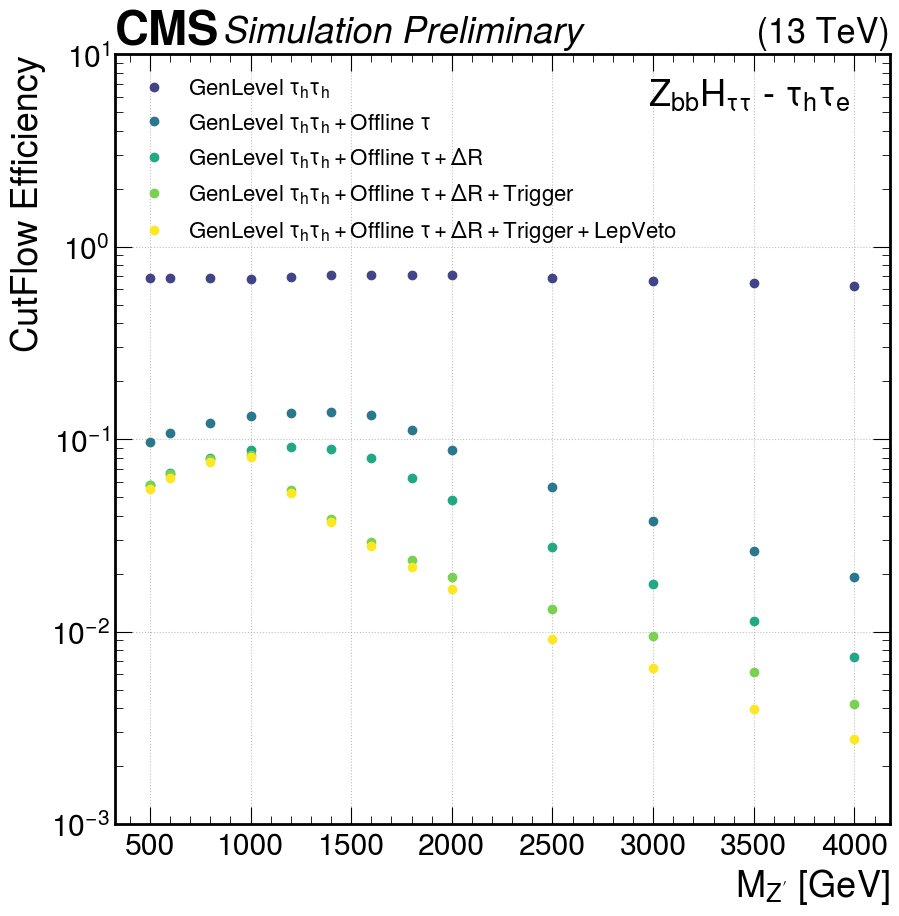

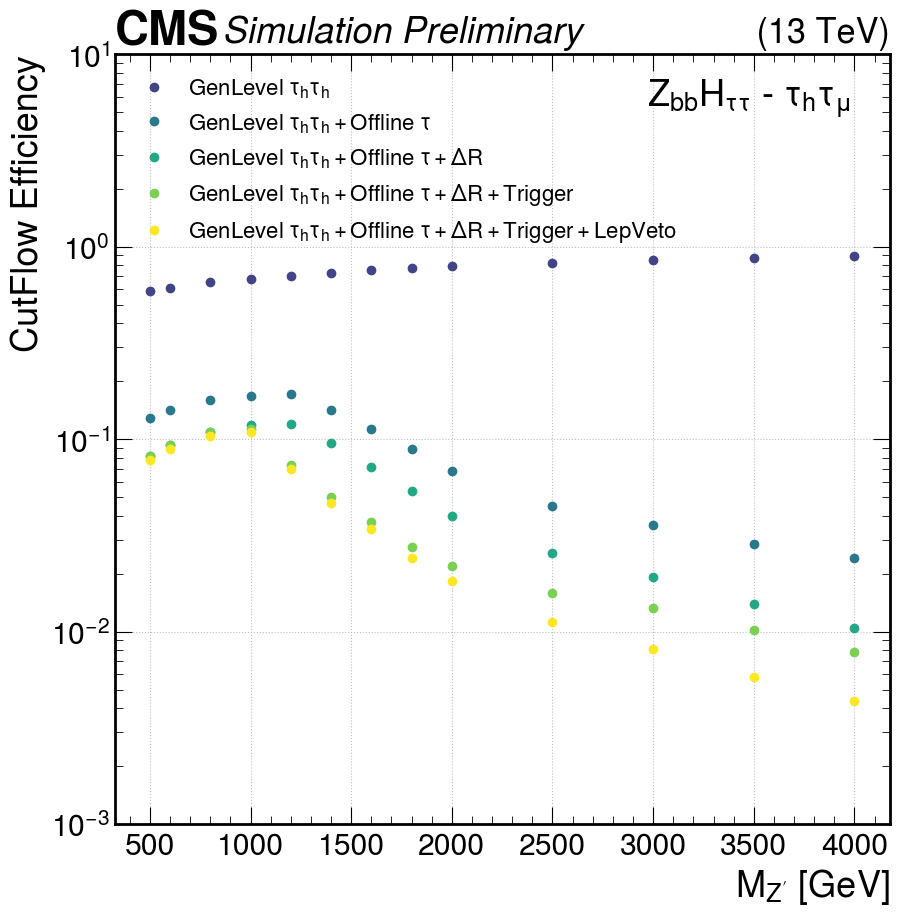

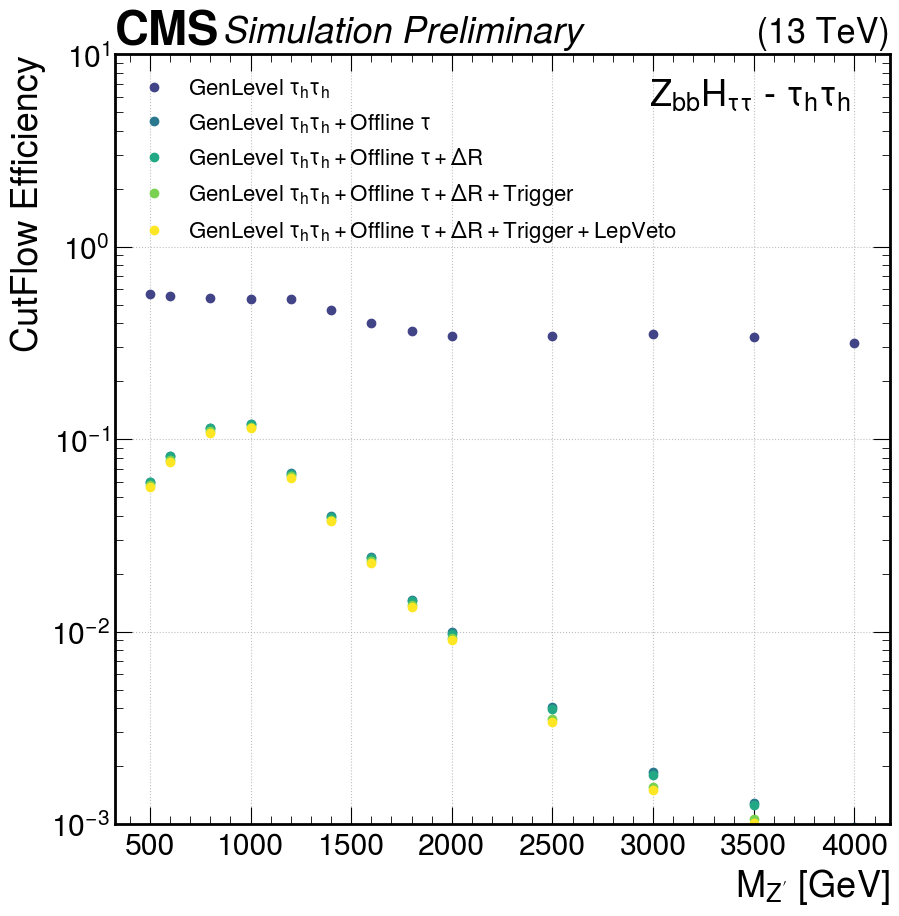

In [5]:
channel = '$\\tau_h\\tau_e$'
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for step in CutFlowSteps.keys():
    step_label = CutFlowSteps[step][1]
    efficiency = [x / y for x, y in zip(CutFlowEfficiency_ETau[step], CutFlowEfficiency_ETau[0])]
    ax.errorbar(mass_points, efficiency, label=step_label, lw=2, linestyle='', marker='o', color=cmap(step/len(CutFlowSteps.keys())))
hep.cms.label("Preliminary")
plt.text(0.95, 0.97, fancy_name + " - " + channel, ha="right", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper left', fontsize=16)
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{sample}_ETau_CutFlow.png')
plt.savefig(outdir + f'/{sample}_ETau_CutFlow.pdf')

channel = '$\\tau_h\\tau_\\mu$'
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for step in CutFlowSteps.keys():
    step_label = CutFlowSteps[step][1]
    efficiency = [x / y for x, y in zip(CutFlowEfficiency_MuTau[step], CutFlowEfficiency_MuTau[0])]
    ax.errorbar(mass_points, efficiency, label=step_label, lw=2, linestyle='', marker='o', color=cmap(step/len(CutFlowSteps.keys())))
hep.cms.label("Preliminary")
plt.text(0.95, 0.97, fancy_name + " - " + channel, ha="right", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper left', fontsize=16)
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{sample}_MuTau_CutFlow.png')
plt.savefig(outdir + f'/{sample}_MuTau_CutFlow.pdf')

channel = '$\\tau_h\\tau_h$'
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for step in CutFlowSteps.keys():
    step_label = CutFlowSteps[step][1]
    efficiency = [x / y for x, y in zip(CutFlowEfficiency_TauTau[step], CutFlowEfficiency_TauTau[0])]
    ax.errorbar(mass_points, efficiency, label=step_label, lw=2, linestyle='', marker='o', color=cmap(step/len(CutFlowSteps.keys())))
hep.cms.label("Preliminary")
plt.text(0.95, 0.97, fancy_name + " - " + channel, ha="right", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper left', fontsize=16)
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{sample}_TauTau_CutFlow.png')
plt.savefig(outdir + f'/{sample}_TauTau_CutFlow.pdf')

# CutFlow study for ZttHbb

In [6]:
cmtdir = '/data_CMS/cms/vernazza/cmt/PreprocessRDF/'
conf = 'ul_2018_ZttHbb_v12'
sample = 'ZprimeToZH_ZToTauTau_HToBB'
fancy_name = r"$Z_{\tau\tau}H_{bb}$"
res_mass = "Z'"
suffix = ''
cat = 'cat_base_selection'
ver = 'prod_240624_CutFlow'
mass_points = [500, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2500, 3000, 3500, 4000]

genPairType = 1
CutFlowSteps = {
    1: ['pairType_skip_ETau_eleOff_ETau_tauOff_ETau_dR_ETau_Trg_ETau_LepVeto', '$GenLevel\; \\tau_h\\tau_e$'],
    2: ['pairType_skip_ETau_tauOff_ETau_dR_ETau_Trg_ETau_LepVeto', '$GenLevel\; \\tau_h\\tau_e + Offline\; e$'],
    3: ['pairType_skip_ETau_dR_ETau_Trg_ETau_LepVeto', '$GenLevel\; \\tau_h\\tau_e + Offline\; e + Offline\; \\tau$'],
    4: ['pairType_skip_ETau_Trg_ETau_LepVeto', '$GenLevel\; \\tau_h\\tau_e + Offline\; e + Offline\; \\tau + \\Delta R$'],
    5: ['pairType_skip_ETau_LepVeto', '$GenLevel\; \\tau_h\\tau_e + Offline\; e + Offline\; \\tau + \\Delta R + Trigger$'],
    5: ['pairType', '$GenLevel\; \\tau_h\\tau_e + Offline\; e + Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
}
CutFlowEfficiency_ETau = {0: []}
CutFlowEfficiency_ETau.update({step: [] for step in CutFlowSteps.keys()})
for mass in tqdm(mass_points):
    indir = f'{cmtdir}/{conf}/{sample}_M{mass}{suffix}/{cat}/{ver}'
    tTree = ROOT.TChain("Events")
    tTree.Add(indir+"/data*.root")
    df = ROOT.RDataFrame(tTree)
    CutFlowEfficiency_ETau[0].append(df.Count().GetValue())
    for step in CutFlowSteps.keys():
        step_name = CutFlowSteps[step][0]
        df_cut = df.Filter(f"{step_name} == {genPairType}")
        CutFlowEfficiency_ETau[step].append(df_cut.Count().GetValue())


genPairType = 0
CutFlowSteps = {
    1: ['pairType_skip_MuTau_muOff_MuTau_tauOff_MuTau_dR_MuTau_Trg_MuTau_LepVeto', '$GenLevel\; \\tau_h\\tau_\\mu$'],
    2: ['pairType_skip_MuTau_tauOff_MuTau_dR_MuTau_Trg_MuTau_LepVeto', '$GenLevel\; \\tau_h\\tau_\\mu + Offline\; \\mu$'],
    3: ['pairType_skip_MuTau_dR_MuTau_Trg_MuTau_LepVeto', '$GenLevel\; \\tau_h\\tau_\\mu + Offline\; \\mu + Offline\; \\tau$'],
    4: ['pairType_skip_MuTau_Trg_MuTau_LepVeto', '$GenLevel\; \\tau_h\\tau_\\mu + Offline\; \\mu + Offline\; \\tau + \\Delta R$'],
    5: ['pairType_skip_MuTau_LepVeto', '$GenLevel\; \\tau_h\\tau_\\mu + Offline\; \\mu + Offline\; \\tau + \\Delta R + Trigger$'],
    5: ['pairType', '$GenLevel\; \\tau_h\\tau_\\mu + Offline\; \\mu + Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
}
CutFlowEfficiency_MuTau = {0: []}
CutFlowEfficiency_MuTau.update({step: [] for step in CutFlowSteps.keys()})
for mass in tqdm(mass_points):
    indir = f'{cmtdir}/{conf}/{sample}_M{mass}{suffix}/{cat}/{ver}'
    tTree = ROOT.TChain("Events")
    tTree.Add(indir+"/data*.root")
    df = ROOT.RDataFrame(tTree)
    CutFlowEfficiency_MuTau[0].append(df.Count().GetValue())
    for step in CutFlowSteps.keys():
        step_name = CutFlowSteps[step][0]
        df_cut = df.Filter(f"{step_name} == {genPairType}")
        CutFlowEfficiency_MuTau[step].append(df_cut.Count().GetValue())


genPairType = 2
CutFlowSteps = {
    1: ['pairType_skip_TauTau_tauOff_TauTau_dR_TauTau_Trg_TauTau_LepVeto', '$GenLevel\; \\tau_h\\tau_h$'],
    2: ['pairType_skip_TauTau_dR_TauTau_Trg_TauTau_LepVeto', '$GenLevel\; \\tau_h\\tau_h + Offline\; \\tau$'],
    3: ['pairType_skip_TauTau_Trg_TauTau_LepVeto', '$GenLevel\; \\tau_h\\tau_h + Offline\; \\tau + \\Delta R$'],
    4: ['pairType_skip_TauTau_LepVeto', '$GenLevel\; \\tau_h\\tau_h + Offline\; \\tau + \\Delta R + Trigger$'],
    5: ['pairType', '$GenLevel\; \\tau_h\\tau_h + Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
}
CutFlowEfficiency_TauTau = {0: []}
CutFlowEfficiency_TauTau.update({step: [] for step in CutFlowSteps.keys()})
for mass in tqdm(mass_points):
    indir = f'{cmtdir}/{conf}/{sample}_M{mass}{suffix}/{cat}/{ver}'
    tTree = ROOT.TChain("Events")
    tTree.Add(indir+"/data*.root")
    df = ROOT.RDataFrame(tTree)
    CutFlowEfficiency_TauTau[0].append(df.Count().GetValue())
    for step in CutFlowSteps.keys():
        step_name = CutFlowSteps[step][0]
        df_cut = df.Filter(f"{step_name} == {genPairType}")
        CutFlowEfficiency_TauTau[step].append(df_cut.Count().GetValue())

  0%|          | 0/13 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:16<00:00,  1.27s/it]


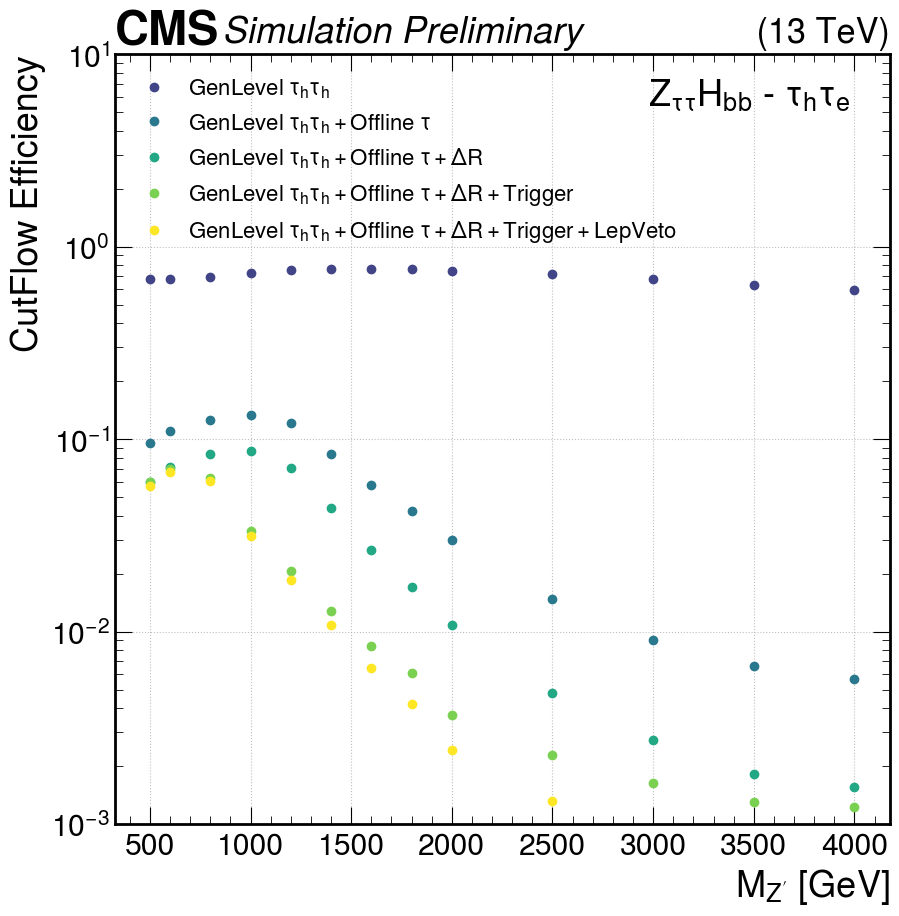

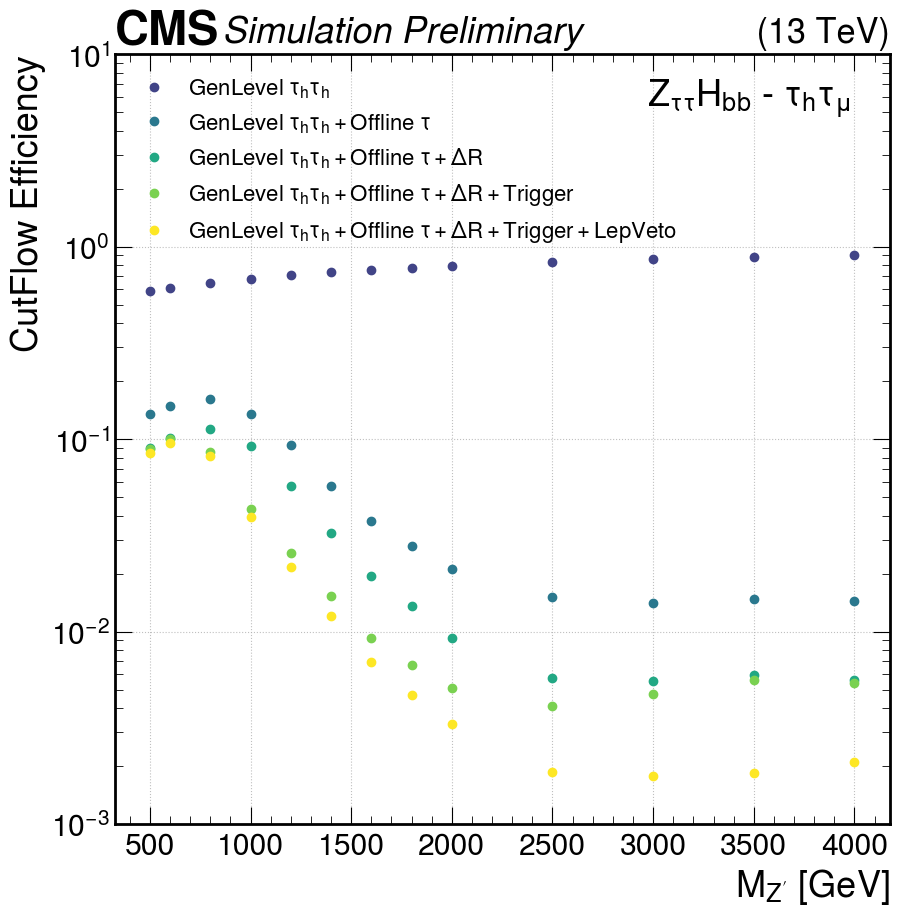

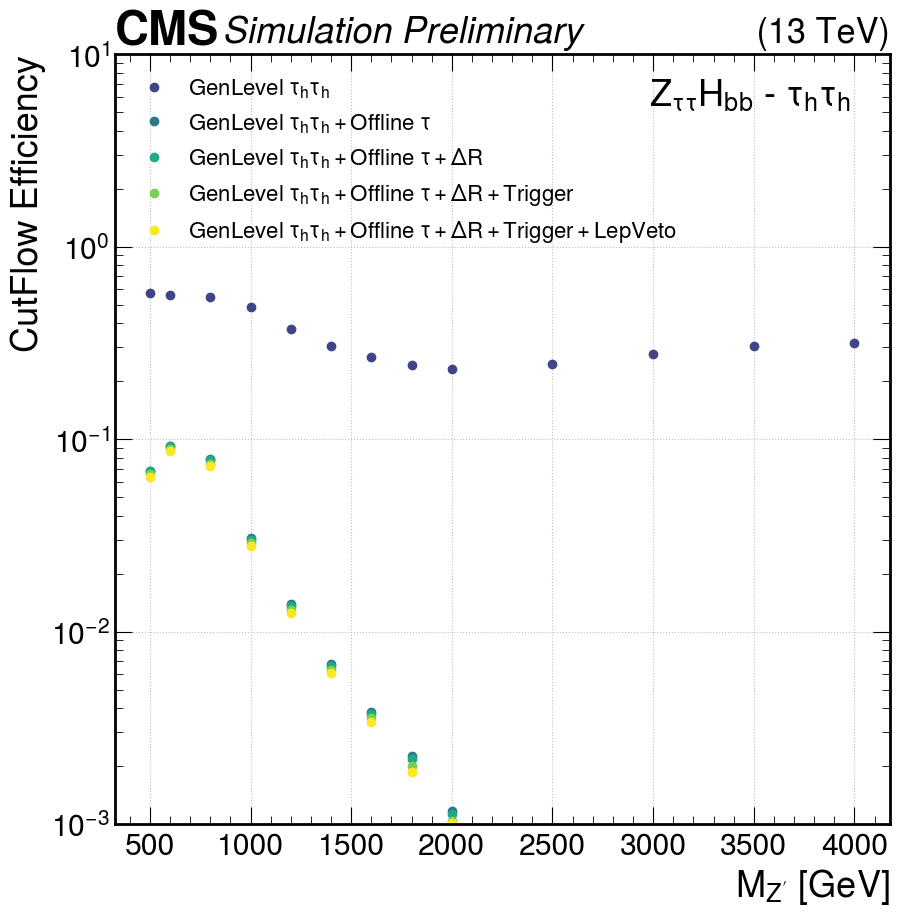

In [7]:
channel = '$\\tau_h\\tau_e$'
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for step in CutFlowSteps.keys():
    step_label = CutFlowSteps[step][1]
    efficiency = [x / y for x, y in zip(CutFlowEfficiency_ETau[step], CutFlowEfficiency_ETau[0])]
    ax.errorbar(mass_points, efficiency, label=step_label, lw=2, linestyle='', marker='o', color=cmap(step/len(CutFlowSteps.keys())))
hep.cms.label("Preliminary")
plt.text(0.95, 0.97, fancy_name + " - " + channel, ha="right", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper left', fontsize=16)
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{sample}_ETau_CutFlow.png')
plt.savefig(outdir + f'/{sample}_ETau_CutFlow.pdf')

channel = '$\\tau_h\\tau_\\mu$'
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for step in CutFlowSteps.keys():
    step_label = CutFlowSteps[step][1]
    efficiency = [x / y for x, y in zip(CutFlowEfficiency_MuTau[step], CutFlowEfficiency_MuTau[0])]
    ax.errorbar(mass_points, efficiency, label=step_label, lw=2, linestyle='', marker='o', color=cmap(step/len(CutFlowSteps.keys())))
hep.cms.label("Preliminary")
plt.text(0.95, 0.97, fancy_name + " - " + channel, ha="right", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper left', fontsize=16)
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{sample}_MuTau_CutFlow.png')
plt.savefig(outdir + f'/{sample}_MuTau_CutFlow.pdf')

channel = '$\\tau_h\\tau_h$'
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for step in CutFlowSteps.keys():
    step_label = CutFlowSteps[step][1]
    efficiency = [x / y for x, y in zip(CutFlowEfficiency_TauTau[step], CutFlowEfficiency_TauTau[0])]
    ax.errorbar(mass_points, efficiency, label=step_label, lw=2, linestyle='', marker='o', color=cmap(step/len(CutFlowSteps.keys())))
hep.cms.label("Preliminary")
plt.text(0.95, 0.97, fancy_name + " - " + channel, ha="right", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper left', fontsize=16)
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{sample}_TauTau_CutFlow.png')
plt.savefig(outdir + f'/{sample}_TauTau_CutFlow.pdf')

# CutFlow study for ZZbbtt (boostedTau)

In [18]:
cmtdir = '/data_CMS/cms/vernazza/cmt/PreprocessRDF/'
conf = 'ul_2018_ZZ_v12'
sample = 'GluGluToXToZZTo2B2Tau'
fancy_name = r"$ZZ_{bb\tau\tau}$"
res_mass = "X"
suffix = '_aux'
cat = 'cat_base_selection'
ver = 'prod_240624_CutFlow'
outdir = f"/grid_mnt/data__data.polcms/cms/vernazza/FrameworkNanoAOD/hhbbtt-analysis/nicePlots/CutFlowSplit/{ver}"
os.system(" mkdir -p " + outdir)
mass_points = [ 200, 210, 220, 230, 240, 250, 260, 270, 280, 300, 320, 350, 360, 400, 450, 500, 550,
                600, 650, 700, 750, 800, 850, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
                1800, 1900, 2000, 2200, 2400, 2500, 2600, 2800, 3000, 3500, 4000, 4500, 5000]

genPairType = 4
CutFlowSteps = {
    1: ['pairType_skip_BTauTau_tauOff_BTauTau_Trg', '$GenLevel\; \\tau_h\\tau_h\; (!DiTau)$'],
    2: ['pairType_skip_BTauTau_Trg', '$GenLevel\; \\tau_h\\tau_h\; (!DiTau)\; + Offline\; \\tau$'],
    3: ['pairType', '$GenLevel\; \\tau_h\\tau_h\; (!DiTau)\; + Offline\; \\tau + Trigger$'],
}
CutFlowEfficiency_TauTau = {0: []}
CutFlowEfficiency_TauTau.update({step: [] for step in CutFlowSteps.keys()})
for mass in tqdm(mass_points):
    indir = f'{cmtdir}/{conf}/{sample}_M{mass}{suffix}/{cat}/{ver}'
    tTree = ROOT.TChain("Events")
    tTree.Add(indir+"/data*.root")
    df = ROOT.RDataFrame(tTree)
    CutFlowEfficiency_TauTau[0].append(df.Count().GetValue())
    for step in CutFlowSteps.keys():
        step_name = CutFlowSteps[step][0]
        df_cut = df.Filter(f"{step_name} == {genPairType}")
        CutFlowEfficiency_TauTau[step].append(df_cut.Count().GetValue())

100%|██████████| 45/45 [00:25<00:00,  1.76it/s]


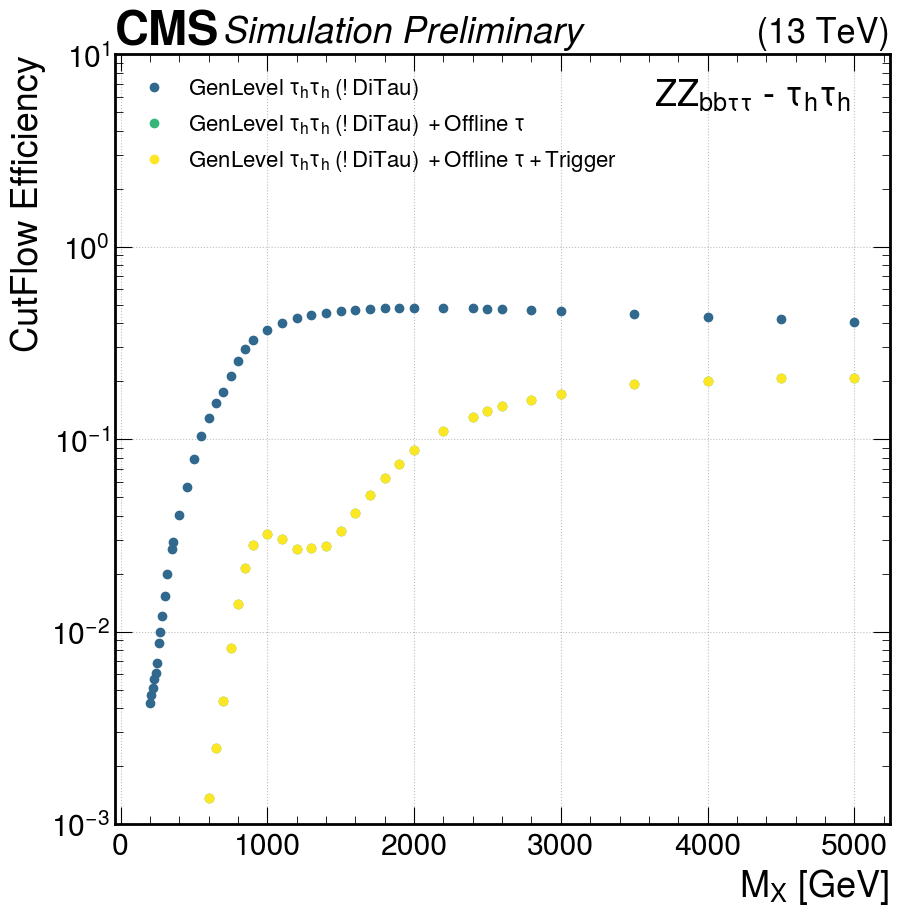

In [19]:
channel = '$\\tau_h\\tau_h$'
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for step in CutFlowSteps.keys():
    step_label = CutFlowSteps[step][1]
    efficiency = [x / y for x, y in zip(CutFlowEfficiency_TauTau[step], CutFlowEfficiency_TauTau[0])]
    ax.errorbar(mass_points, efficiency, label=step_label, lw=2, linestyle='', marker='o', color=cmap(step/len(CutFlowSteps.keys())))
hep.cms.label("Preliminary")
plt.text(0.95, 0.97, fancy_name + " - " + channel, ha="right", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper left', fontsize=16)
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{sample}_aux_BTauTau_CutFlow.png')
plt.savefig(outdir + f'/{sample}_aux_BTauTau_CutFlow.pdf')

In [21]:
cmtdir = '/data_CMS/cms/vernazza/cmt/PreprocessRDF/'
conf = 'ul_2018_ZbbHtt_v12'
sample = 'ZprimeToZH_ZToBB_HToTauTau'
fancy_name = r"$Z_{bb}H_{\tau\tau}$"
res_mass = "Z'"
suffix = '_aux'
cat = 'cat_base_selection'
ver = 'prod_240624_CutFlow'
mass_points = [500, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2500, 3000, 3500, 4000]

genPairType = 4
CutFlowSteps = {
    1: ['pairType_skip_BTauTau_tauOff_BTauTau_Trg', '$GenLevel\; \\tau_h\\tau_h\; (!DiTau)$'],
    2: ['pairType_skip_BTauTau_Trg', '$GenLevel\; \\tau_h\\tau_h\; (!DiTau)\; + Offline\; \\tau$'],
    3: ['pairType', '$GenLevel\; \\tau_h\\tau_h\; (!DiTau)\; + Offline\; \\tau + Trigger$'],
}
CutFlowEfficiency_TauTau = {0: []}
CutFlowEfficiency_TauTau.update({step: [] for step in CutFlowSteps.keys()})
for mass in tqdm(mass_points):
    indir = f'{cmtdir}/{conf}/{sample}_M{mass}{suffix}/{cat}/{ver}'
    tTree = ROOT.TChain("Events")
    tTree.Add(indir+"/data*.root")
    df = ROOT.RDataFrame(tTree)
    CutFlowEfficiency_TauTau[0].append(df.Count().GetValue())
    for step in CutFlowSteps.keys():
        step_name = CutFlowSteps[step][0]
        df_cut = df.Filter(f"{step_name} == {genPairType}")
        CutFlowEfficiency_TauTau[step].append(df_cut.Count().GetValue())

100%|██████████| 13/13 [00:57<00:00,  4.44s/it]


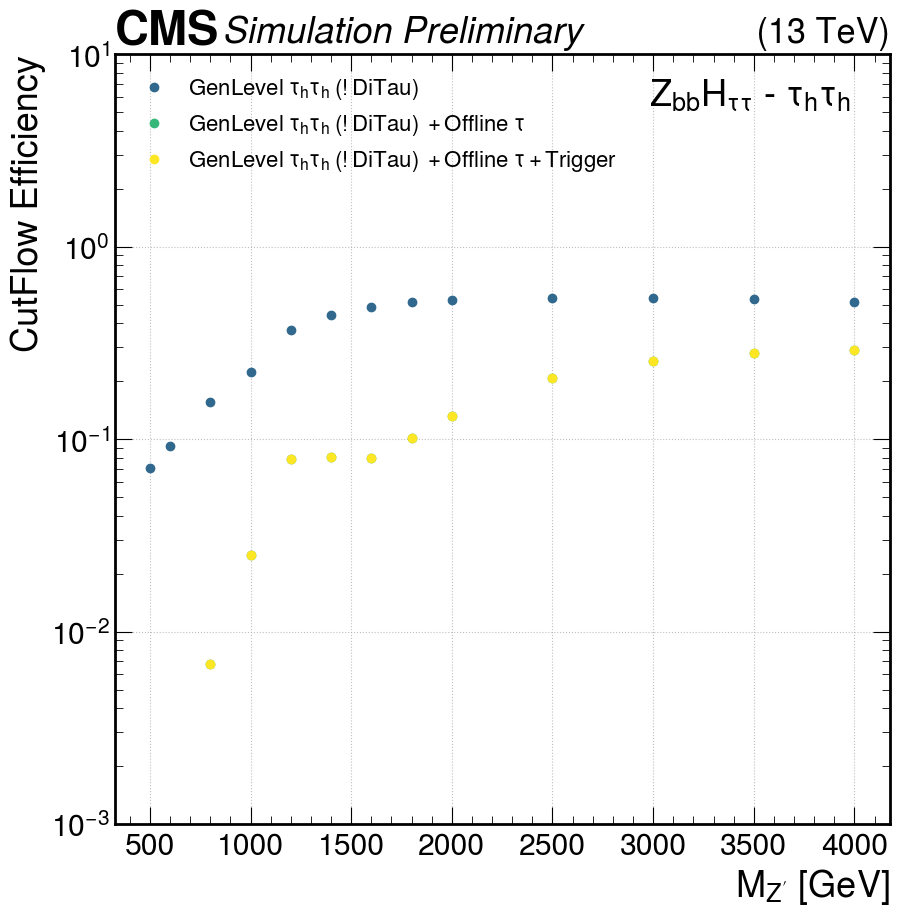

In [22]:
channel = '$\\tau_h\\tau_h$'
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for step in CutFlowSteps.keys():
    step_label = CutFlowSteps[step][1]
    efficiency = [x / y for x, y in zip(CutFlowEfficiency_TauTau[step], CutFlowEfficiency_TauTau[0])]
    ax.errorbar(mass_points, efficiency, label=step_label, lw=2, linestyle='', marker='o', color=cmap(step/len(CutFlowSteps.keys())))
hep.cms.label("Preliminary")
plt.text(0.95, 0.97, fancy_name + " - " + channel, ha="right", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper left', fontsize=16)
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{sample}_aux_BTauTau_CutFlow.png')
plt.savefig(outdir + f'/{sample}_aux_BTauTau_CutFlow.pdf')

In [24]:
cmtdir = '/data_CMS/cms/vernazza/cmt/PreprocessRDF/'
conf = 'ul_2018_ZttHbb_v12'
sample = 'ZprimeToZH_ZToTauTau_HToBB'
fancy_name = r"$Z_{\tau\tau}H_{bb}$"
res_mass = "Z'"
suffix = '_aux'
cat = 'cat_base_selection'
ver = 'prod_240624_CutFlow'
mass_points = [500, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2500, 3000, 3500, 4000]

genPairType = 4
CutFlowSteps = {
    1: ['pairType_skip_BTauTau_tauOff_BTauTau_Trg', '$GenLevel\; \\tau_h\\tau_h\; (!DiTau)$'],
    2: ['pairType_skip_BTauTau_Trg', '$GenLevel\; \\tau_h\\tau_h\; (!DiTau)\; + Offline\; \\tau$'],
    3: ['pairType', '$GenLevel\; \\tau_h\\tau_h\; (!DiTau)\; + Offline\; \\tau + Trigger$'],
}
CutFlowEfficiency_TauTau = {0: []}
CutFlowEfficiency_TauTau.update({step: [] for step in CutFlowSteps.keys()})
for mass in tqdm(mass_points):
    indir = f'{cmtdir}/{conf}/{sample}_M{mass}{suffix}/{cat}/{ver}'
    tTree = ROOT.TChain("Events")
    tTree.Add(indir+"/data*.root")
    df = ROOT.RDataFrame(tTree)
    CutFlowEfficiency_TauTau[0].append(df.Count().GetValue())
    for step in CutFlowSteps.keys():
        step_name = CutFlowSteps[step][0]
        df_cut = df.Filter(f"{step_name} == {genPairType}")
        CutFlowEfficiency_TauTau[step].append(df_cut.Count().GetValue())

100%|██████████| 13/13 [00:55<00:00,  4.26s/it]


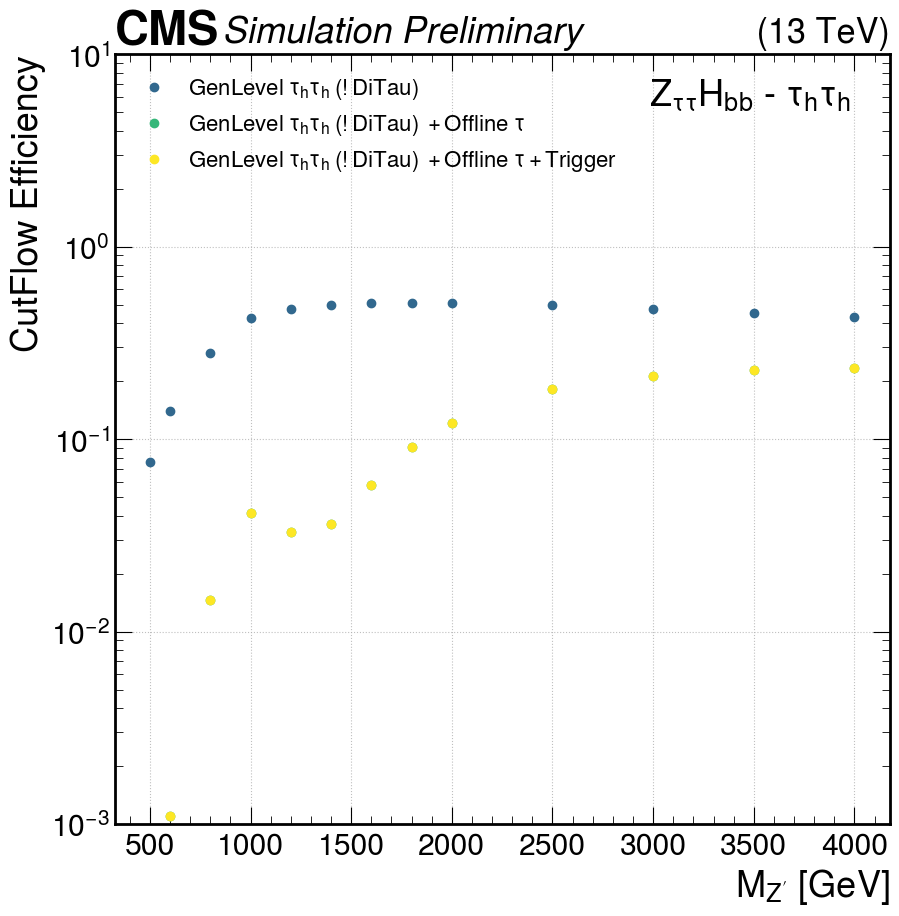

In [25]:
channel = '$\\tau_h\\tau_h$'
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for step in CutFlowSteps.keys():
    step_label = CutFlowSteps[step][1]
    efficiency = [x / y for x, y in zip(CutFlowEfficiency_TauTau[step], CutFlowEfficiency_TauTau[0])]
    ax.errorbar(mass_points, efficiency, label=step_label, lw=2, linestyle='', marker='o', color=cmap(step/len(CutFlowSteps.keys())))
hep.cms.label("Preliminary")
plt.text(0.95, 0.97, fancy_name + " - " + channel, ha="right", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper left', fontsize=16)
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{sample}_aux_BTauTau_CutFlow.png')
plt.savefig(outdir + f'/{sample}_aux_BTauTau_CutFlow.pdf')